# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Show plots inline
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [3]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone_3/fashion_products.csv')
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


# Inspect the Data

In [4]:
# Code task 2
# Check if there are unique values for each column

df.nunique()

User ID          100
Product ID      1000
Product Name       5
Brand              5
Category           3
Price             91
Rating          1000
Color              6
Size               4
dtype: int64

In [5]:
# Code task 3
# Check the shape of the data

print(df.shape)

(1000, 9)


In [6]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
# Code task 5
# Check if there are any missing values in the columns

df.isnull().sum()

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

In [8]:
# Code task 6
# Check the description of the numerical column in the DataFrame

df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [9]:
# Code task 7
# Use df's`select_dtypes` method to select only numeric columns

df.select_dtypes(include = "number")

,User ID,Product ID,Price,Rating
0,19,1,40,1.043159
1,97,2,82,4.026416
2,25,3,44,3.337938
3,57,4,23,1.049523
4,79,5,79,4.302773
...,...,...,...,...
995,20,996,55,1.620081
996,42,997,13,1.544464
997,9,998,47,3.961913
998,8,999,68,3.089722


In [10]:
#Code task 8
#Use pandas' Series method `value_counts` to check the frequency of a Brand occurred in the data

df['Brand'].value_counts().head()

Brand
Nike      214
Zara      203
Adidas    198
H&M       194
Gucci     191
Name: count, dtype: int64

In [11]:
# Code task 9
# Call data's `describe` method for a statistical summary of the numerical columns
# Hint: there are fewer summary stat columns than features, so displaying the transpose will be useful again

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,50.419000,28.781310,1.000000,26.000000,50.000000,75.000000,100.000000
Product ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Price,1000.0,55.785000,26.291748,10.000000,33.000000,57.000000,78.250000,100.000000
Rating,1000.0,2.993135,1.153185,1.000967,1.992786,2.984003,3.985084,4.987964


# Distribution Of dataset
Our primary focus is to observe the distribution of the data and display any outliers attributes in data.

# Visualizing Numerical Data Distribution

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Product ID'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

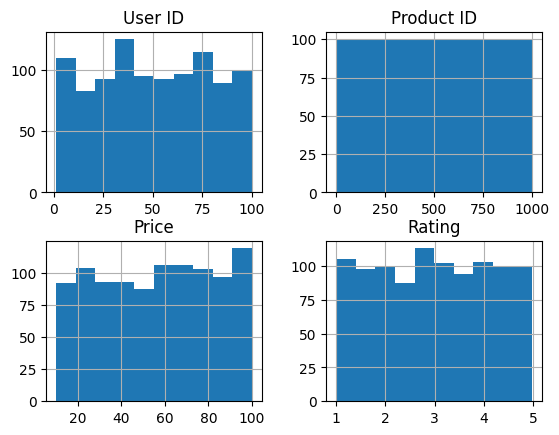

In [12]:
# Code task 10
# Call df_train's `hist` method to plot histograms to check if there are any outliers in columns

df.hist()

<Axes: >

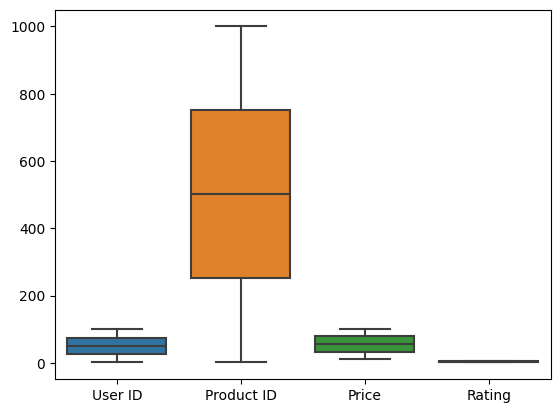

In [13]:
# Code task 11
# Create a seaborn boxplot of the df dataframe we created above,to again confirm for the outliers
# in each columns. This will use boxplot's data argument.
# Compare the dataset - Our goal is to understand whether the distribution is symmetrical or skewed and display any outliers attributes in data.

sns.boxplot(df)

No outliers detected in all numeric columns including User ID, Product ID, Price, Rating

# Visualizing Categorical Data Distribution

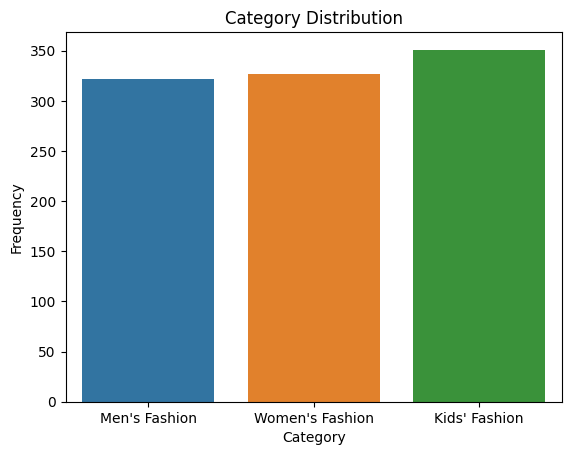

In [14]:
# Code task 12
# Use train data's `plot()` method to create a barplot with 'Category' on the x-axis 
# Shows frequency distribution of various Categories

sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

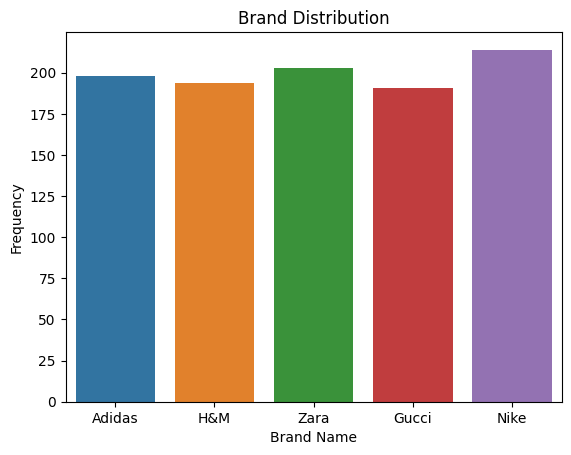

In [15]:
# Code task 13
# Use train data's `plot()` method to create a barplot with 'Brand' on the x-axis 
# Shows frequency distribution of various Brands

sns.countplot(x='Brand', data=df)
plt.title('Brand Distribution')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')
plt.show()

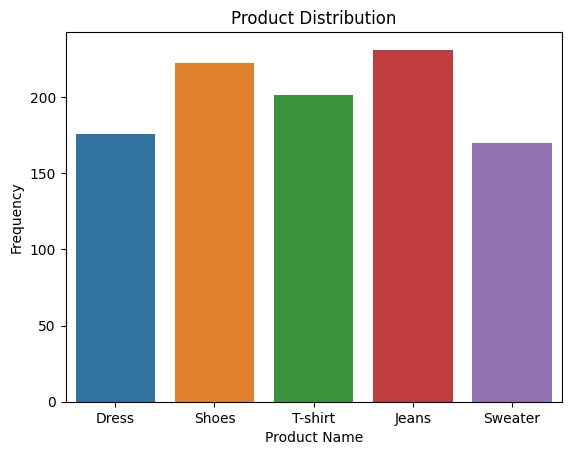

In [16]:
# Code task 14
# Use train data's `plot()` method to create a barplot with 'Product Name' on the x-axis 
# Shows frequency distribution of various Products

sns.countplot(x='Product Name', data=df)
plt.title('Product Distribution')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.show()

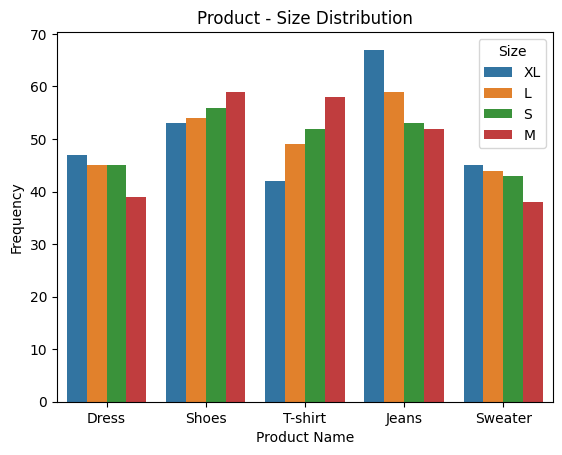

In [17]:
# Code task 15
# Use train data's `plot()` method to create a barplot with 'Product Name' on the x-axis 
# Shows frequency distribution of various Products in terms of size

sns.countplot(x='Product Name', hue = "Size", data=df)
plt.title('Product - Size Distribution')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.show()

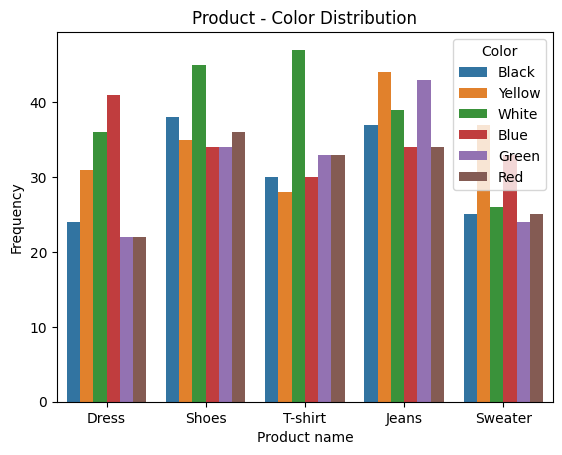

In [18]:
# Code task 16
# Use train data's `plot()` method to create a barplot with 'Product Name' on the x-axis 
# Shows frequency distribution of various Products in terms of Color

sns.countplot(x='Product Name', hue = "Color", data=df)
plt.title('Product - Color Distribution')
plt.xlabel('Product name')
plt.ylabel('Frequency')
plt.show()

# Plot Summary and Conclusions 
Based on the above histogram, box plot (Numerical variables) and bar plot (Categorical variables), we can make the following conclusions:

Above plot clearly depicts that the distribution of data is multi-modal that has multiple peaks and also the length of two whiskers are varied.

There are no outliers present in the data.

The frequency of Kid's fashion is slight higher than the men's and women's fashion.

Among all the brands, the count of Nike products are slightly higher than other brands.

Products such as Jeans, shoes and t-shirts are more popular in this dataset.

In product jeans, XL seems most popular. M size tops the list in two product categories, shoes and t-shirts. 

Color White seems extremely popular in shoes and t-shirt categories. 

# Rating for each Product ID

Distribution of Rating per Product ID, shows how rating for each Product ID look like?

In [37]:
# Code task 21

df_train = df.set_index('Product ID')
df_train

,User ID,Product Name,Brand,Category,Price,Rating,Color,Size
Product ID,,,,,,,,
1,19,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
2,97,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
3,25,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
4,57,Shoes,Zara,Men's Fashion,23,1.049523,White,S
5,79,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...
996,20,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
997,42,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
998,9,Sweater,Zara,Men's Fashion,47,3.961913,White,L


In [38]:
# Code task 22

df.Rating.sort_values(ascending=False).head()

501    4.987964
417    4.986091
578    4.985950
198    4.980656
703    4.979678
Name: Rating, dtype: float64

Product ID 501, 417, 578 dominates per Rating.

# Total Price distribution per Product ID

In [39]:
# Code task 23

df.Price.sort_values(ascending=False)

268    100
868    100
711    100
937    100
91     100
      ... 
927     10
558     10
728     10
603     10
131     10
Name: Price, Length: 1000, dtype: int64

Product ID 268, 868, 711 are among top three products that are most expensive.

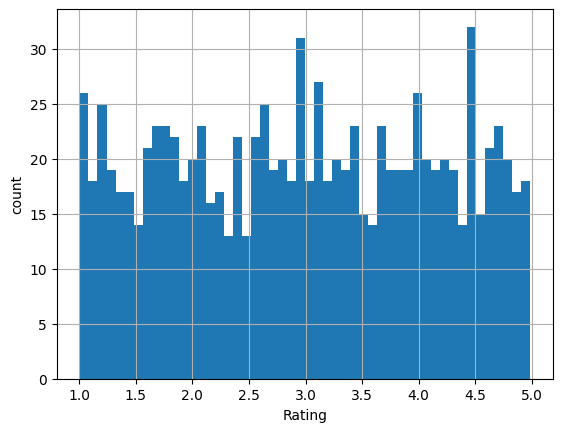

In [40]:
# Code task 24
# Call df_train's `hist` method to plot histograms to view the distribution of Rating per product ID

df.Rating.hist(bins = 50)
plt.xlabel('Rating')
plt.ylabel('count');

# Feature correlation heatmap

Use the heatmap to uncover relationships between features and understand the underlying structure of the data.

In [43]:
#Code task 32

# Compute the correlation matrix

correlation_matrix = df.corr(numeric_only=True)
correlation_matrix.head()

,User ID,Product ID,Price,Rating
User ID,1.000000,-0.021075,0.003363,0.044837
Product ID,-0.021075,1.000000,0.034602,0.033896
Price,0.003363,0.034602,1.000000,0.033927
Rating,0.044837,0.033896,0.033927,1.000000


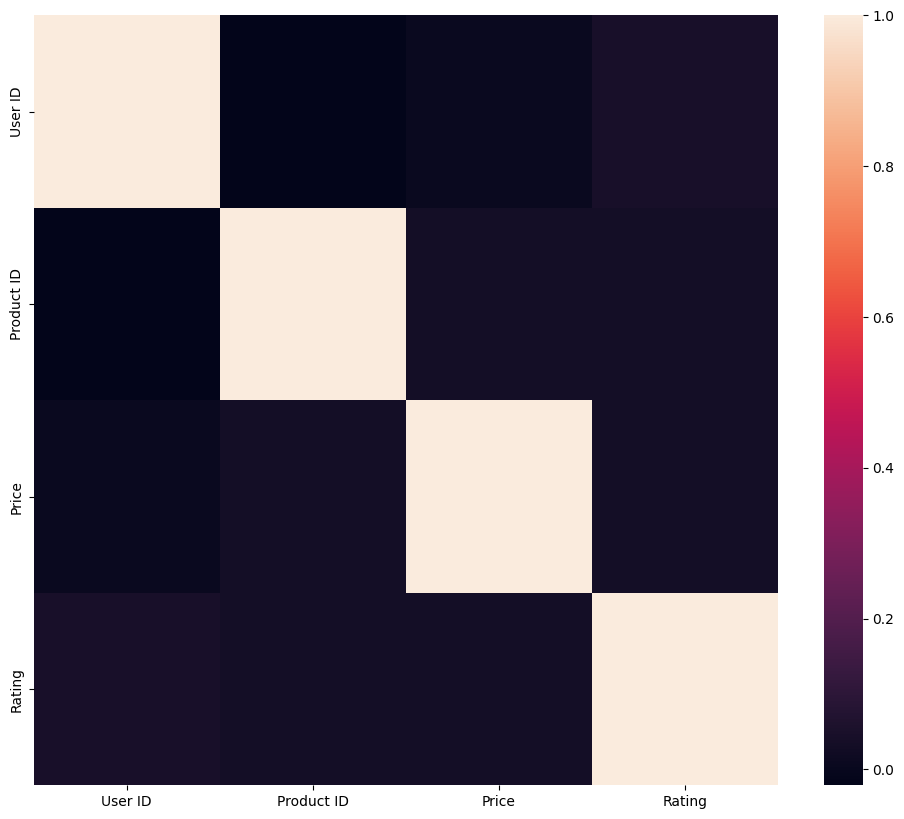

In [42]:
#Code task 33

plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True));

As per Feature Heatmap above, there is no correlation between numeric features.

In [44]:
#Code task 34
#Save the data to a new csv file

df.to_csv('df_features.csv', index=False)